# K-means na unha "1 tentativa"

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import random as rd
from matplotlib import style
style.use('ggplot')

In [ ]:
iris = load_iris()
X= iris.data[:,:2]

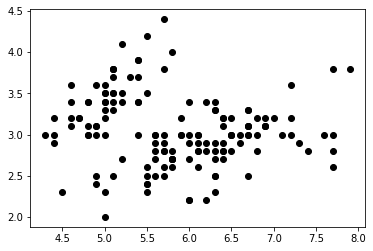

In [ ]:
plt.scatter(X[:,0],X[:,1],c='black')
plt.show()

In [ ]:
m=X.shape[0] #number of training
n=X.shape[1] #number of features
n_iter=100

In [ ]:
K=2 # number of clusters

In [ ]:
Centroids=np.array([]).reshape(n,0)

In [ ]:
for i in range(K):
    rand=rd.randint(0,m-1)
    Centroids=np.c_[Centroids,X[rand]]

In [ ]:
Output={}

In [ ]:
EuclidianDistance=np.array([]).reshape(m,0)
for k in range(K):
       tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
EuclidianDistance=np.c_[EuclidianDistance,tempDist]
C=np.argmin(EuclidianDistance,axis=1)+1

In [ ]:
Y={}
for k in range(K):
    Y[k+1]=np.array([]).reshape(2,0)
for i in range(m):
    Y[C[i]]=np.c_[Y[C[i]],X[i]]

for k in range(K):
    Y[k+1]=Y[k+1].T

for k in range(K):
     Centroids[:,k]=np.mean(Y[k+1],axis=0)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


In [ ]:
for i in range(n_iter):
     #step 2.a
      EuclidianDistance=np.array([]).reshape(m,0)
      for k in range(K):
          tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
          EuclidianDistance=np.c_[EuclidianDistance,tempDist]
      C=np.argmin(EuclidianDistance,axis=1)+1
     #step 2.b
      Y={}
      for k in range(K):
          Y[k+1]=np.array([]).reshape(2,0)
      for i in range(m):
          Y[C[i]]=np.c_[Y[C[i]],X[i]]

      for k in range(K):
          Y[k+1]=Y[k+1].T

      for k in range(K):
          Centroids[:,k]=np.mean(Y[k+1],axis=0)
      Output=Y

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


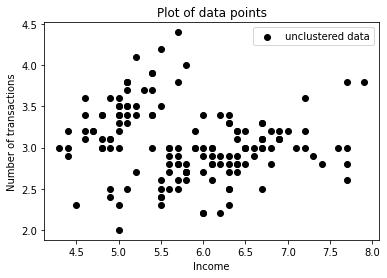

In [ ]:
plt.scatter(X[:,0],X[:,1],c='black',label='unclustered data')
plt.xlabel('Income')
plt.ylabel('Number of transactions')
plt.legend()
plt.title('Plot of data points')
plt.show()

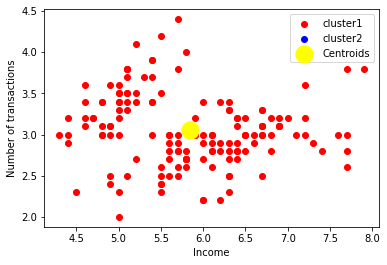

In [ ]:
color=['red','blue']
labels=['cluster1','cluster2']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[0,:],Centroids[1,:],s=300,c='yellow',label='Centroids')
plt.xlabel('Income')
plt.ylabel('Number of transactions')
plt.legend()
plt.show()

# Melhor valor para K

In [ ]:
i=rd.randint(0,X.shape[0])
Centroid=np.array([X[i]])

In [ ]:
D=np.array([])
for x in X:
    D=np.append(D,np.min(np.sum((x-Centroid)**2)))

In [ ]:
prob=D/np.sum(D)

In [ ]:
cummulative_prob=np.cumsum(prob)

In [ ]:
r=rd.random()
i=0
for j,p in enumerate(cummulative_prob):
    if r<p:
       i=j
       break
Centroid=np.append(Centroid,[X[i]],axis=0)

In [ ]:
i=rd.randint(0,X.shape[0])
Centroid=np.array([X[i]])
K=2
for k in range(1,K):
    D=np.array([])
    for x in X:
        D=np.append(D,np.min(np.sum((x-Centroid)**2)))
    prob=D/np.sum(D)
    cummulative_prob=np.cumsum(prob)
    r=rd.random()
    i=0
    for j,p in enumerate(cummulative_prob):
        if r<p:
            i=j
            break
    Centroid=np.append(Centroid,[X[i]],axis=0)

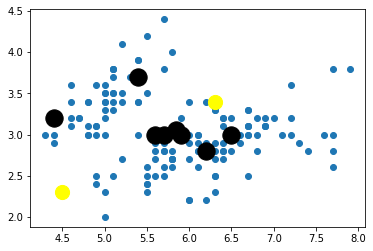

In [ ]:
for i in range(K):
    rand=rd.randint(0,m-1)
    Centroids=np.c_[Centroids,X[rand]]
plt.scatter(X[:,0],X[:,1])
plt.scatter(Centroid[:,0],Centroid[:,1],s=200,color='yellow')
plt.scatter(Centroids[0,:],Centroids[1,:],s=300,color='black')

# Utilizando sklearn

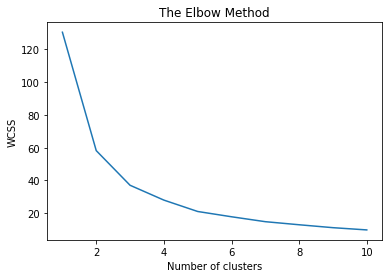

In [ ]:
#lets implement the same algorithm using sklearn libraries
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

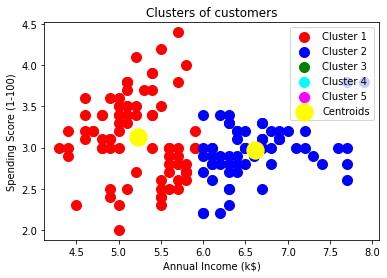

In [ ]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# K-means na unha "que deu certo"


In [ ]:
class K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

13.554960445716766
1.334025135477905
0.9475679086871764
5.477281713173303
3.783615349048154
1.1527334177534703
0.0375396921804432
0.19262839508812268


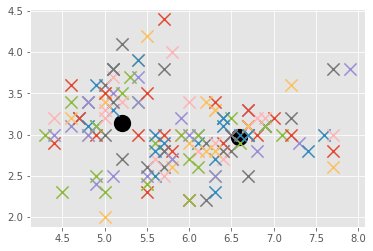

In [ ]:
model = K_Means()
model.fit(X)

for centroid in model.centroids:
    plt.scatter(model.centroids[centroid][0], model.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=5)

for classification in model.classifications:
    color = ['red','blue']
    for featureset in model.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", s=150, linewidths=5)

plt.show()